# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [119]:
## Observations
# 1. There is no apparent correlation between city latitude and humidity.
# 2. The further a city's latitude is from the equater the lower its average temperature.
# 3. There is no apparent correlation between city latitude and cloudiness.

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [95]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
# Save config information:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='

In [97]:
# Set up lists to hold response info:
city_name=[]    # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                              
            city_name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') 
            
        count=count+1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 597 | albany
Processing Record 2 of 597 | qaqortoq
Processing Record 3 of 597 | busselton
Processing Record 4 of 597 | kiruna
Processing Record 5 of 597 | souillac
Processing Record 6 of 597 | kapaa
Processing Record 7 of 597 | suleja
Processing Record 8 of 597 | qaanaaq
Processing Record 9 of 597 | talnakh
Processing Record 10 of 597 | carnarvon
Processing Record 11 of 597 | vaitupu
vaitupu city not found. Skipping...
Processing Record 12 of 597 | cape town
Processing Record 13 of 597 | tiksi
Processing Record 14 of 597 | okara
Processing Record 15 of 597 | ambanja
Processing Record 16 of 597 | podosinovets
Processing Record 17 of 597 | illoqqortoormiut
illoqqortoormiut city not found. Skipping...
Processing Record 18 of 597 | avarua
Processing Record 19 of 597 | hobart
Processing Record 20 of 597 | barrow
Processing Record 21 of 597 | vallenar
Processing Record 22 of 597 | barentsburg
barentsburg city not f

Processing Record 195 of 597 | kamenka
Processing Record 196 of 597 | hamilton
Processing Record 197 of 597 | port-gentil
Processing Record 198 of 597 | mingaora
Processing Record 199 of 597 | sentyabrskiy
sentyabrskiy city not found. Skipping...
Processing Record 200 of 597 | cooma
Processing Record 201 of 597 | tres arroyos
Processing Record 202 of 597 | dicabisagan
Processing Record 203 of 597 | pangnirtung
Processing Record 204 of 597 | maceio
Processing Record 205 of 597 | ribeira grande
Processing Record 206 of 597 | batagay
Processing Record 207 of 597 | dolbeau
dolbeau city not found. Skipping...
Processing Record 208 of 597 | samagaltay
Processing Record 209 of 597 | itapetininga
Processing Record 210 of 597 | aleksandrovsk-sakhalinskiy
Processing Record 211 of 597 | yokadouma
Processing Record 212 of 597 | daru
Processing Record 213 of 597 | fortuna
Processing Record 214 of 597 | torbay
Processing Record 215 of 597 | narsaq
Processing Record 216 of 597 | nueve de julio
Proces

Processing Record 381 of 597 | cerrito
Processing Record 382 of 597 | kencong
Processing Record 383 of 597 | pevek
Processing Record 384 of 597 | oksfjord
Processing Record 385 of 597 | upernavik
Processing Record 386 of 597 | hobyo
Processing Record 387 of 597 | praya
Processing Record 388 of 597 | petropavl
Processing Record 389 of 597 | aleksandrov gay
Processing Record 390 of 597 | alice springs
Processing Record 391 of 597 | jadu
Processing Record 392 of 597 | ahipara
Processing Record 393 of 597 | constitucion
Processing Record 394 of 597 | krasnoselkup
Processing Record 395 of 597 | ajdabiya
Processing Record 396 of 597 | cocorit
Processing Record 397 of 597 | general roca
Processing Record 398 of 597 | kitob
Processing Record 399 of 597 | cockburn town
Processing Record 400 of 597 | kathu
Processing Record 401 of 597 | abu kamal
Processing Record 402 of 597 | hai duong
Processing Record 403 of 597 | asau
Processing Record 404 of 597 | umm kaddadah
Processing Record 405 of 597 |

Processing Record 570 of 597 | pecos
Processing Record 571 of 597 | virginia beach
Processing Record 572 of 597 | ferry pass
Processing Record 573 of 597 | loralai
Processing Record 574 of 597 | kytmanovo
Processing Record 575 of 597 | ginda
Processing Record 576 of 597 | coihaique
Processing Record 577 of 597 | black river
Processing Record 578 of 597 | santa fe
Processing Record 579 of 597 | independencia
Processing Record 580 of 597 | tautira
Processing Record 581 of 597 | vuktyl
Processing Record 582 of 597 | yumen
Processing Record 583 of 597 | arrifes
Processing Record 584 of 597 | oistins
Processing Record 585 of 597 | karauzyak
karauzyak city not found. Skipping...
Processing Record 586 of 597 | alihe
Processing Record 587 of 597 | lar
Processing Record 588 of 597 | lixourion
Processing Record 589 of 597 | pahrump
Processing Record 590 of 597 | tupik
Processing Record 591 of 597 | decatur
Processing Record 592 of 597 | dakar
Processing Record 593 of 597 | koumac
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": ctry,
    "Date": date,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": maxtemp,
    "Humidity": humi,
    "Cloudiness": cloud,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               550
Country            550
Date               550
Latitude           550
Longitude          550
Max Temperature    550
Humidity           550
Cloudiness         550
Wind Speed         550
dtype: int64

In [100]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Albany,US,1666741108,42.6001,-73.9662,67.39,88,83,4.54
1,Qaqortoq,GL,1666741109,60.7167,-46.0333,28.27,71,0,6.71
2,Busselton,AU,1666741110,-33.6500,115.3333,57.24,79,82,8.77
3,Kiruna,SE,1666741110,67.8557,20.2251,23.47,90,97,2.64
4,Souillac,MU,1666741110,-20.5167,57.5167,71.98,83,40,9.22


In [101]:
# Export & Save Data Into a .csv.
weather_data.to_csv("../WeatherPy/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
#check if there are any cities with Humidity >100% 
weather_data["Humidity"].describe()

count    550.000000
mean      74.232727
std       19.994544
min        1.000000
25%       65.000000
50%       80.000000
75%       90.000000
max      100.000000
Name: Humidity, dtype: float64

In [103]:
#  Get the indices of cities that have humidity over 100%.
humidity_101 = weather_data[(weather_data["Humidity"] > 100)].index
humidity_101

Int64Index([], dtype='int64')

In [104]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(humidity_101, inplace=False)
clean_city_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Albany,US,1666741108,42.6001,-73.9662,67.39,88,83,4.54
1,Qaqortoq,GL,1666741109,60.7167,-46.0333,28.27,71,0,6.71
2,Busselton,AU,1666741110,-33.6500,115.3333,57.24,79,82,8.77
3,Kiruna,SE,1666741110,67.8557,20.2251,23.47,90,97,2.64
4,Souillac,MU,1666741110,-20.5167,57.5167,71.98,83,40,9.22
...,...,...,...,...,...,...,...,...,...
545,Koumac,NC,1666741296,-20.5667,164.2833,78.93,72,10,6.22
546,Skjervøy,NO,1666741296,70.0311,20.9714,28.40,57,100,3.09
547,Omboué,GA,1666741297,-1.5746,9.2618,76.75,89,98,2.75
548,Bambanglipuro,ID,1666741297,-7.9500,110.2833,78.13,80,100,6.29


In [105]:
# Export the filtered city data into a csv
clean_city_data.to_csv("../WeatherPy/clean_city_data.csv", index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

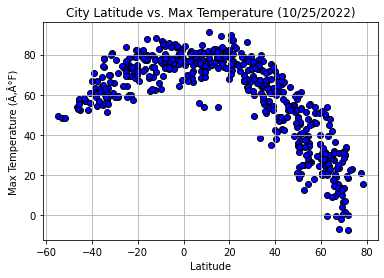

<Figure size 432x288 with 0 Axes>

In [106]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (10/25/2022)")
plt.ylabel("Max Temperature (Ã‚Â°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

# Save Figure
plt.savefig("../WeatherPy/City_Latitude_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

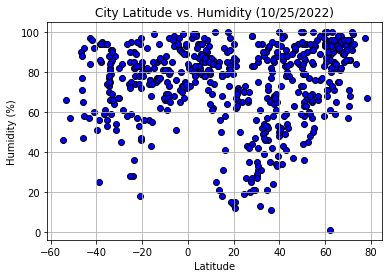

<Figure size 432x288 with 0 Axes>

In [107]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (10/25/2022)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

# Save Figure
plt.savefig("../WeatherPy/City_Latitude_vs_Humidity.png")


## Latitude vs. Cloudiness Plot

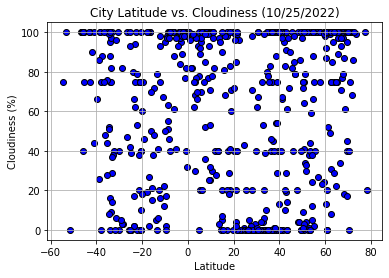

<Figure size 432x288 with 0 Axes>

In [108]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (10/25/2022)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

# Save Figure
plt.savefig("../WeatherPy/City_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

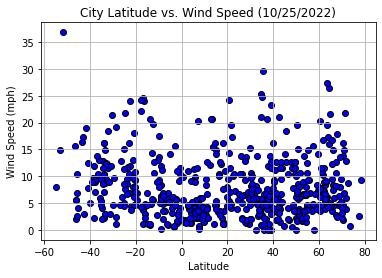

<Figure size 432x288 with 0 Axes>

In [109]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (10/25/2022)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

# Save Figure
plt.savefig("../WeatherPy/City_Latitude_vs_Wind_Speed.png")

## Linear Regression

In [110]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[pd.to_numeric(weather_data["Latitude"]).astype(float) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.96x + 91.83
The r-squared is: -0.8685974968911252
The regression displays a negative correlation.


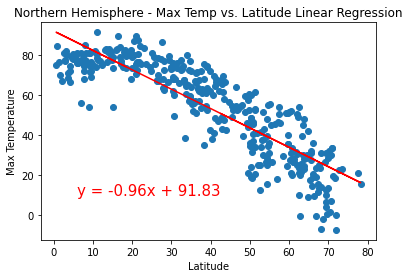

<Figure size 432x288 with 0 Axes>

In [111]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/NH_Max_Temp_vs_Lat_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 81.86
The r-squared is: 0.7452211208264848
The regression displays a positive correlation.


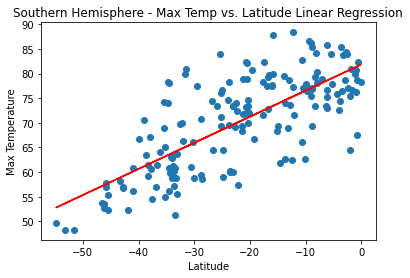

<Figure size 432x288 with 0 Axes>

In [112]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/SH_Max_Temp_vs_Lat_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 67.23
The r-squared is: 0.16166270628455243


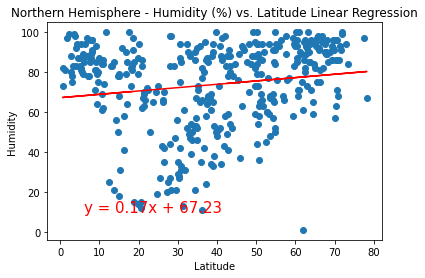

<Figure size 432x288 with 0 Axes>

In [113]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/NH_Humidity_vs_Lat_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.21x + 79.9
The r-squared is: 0.1760666179703524


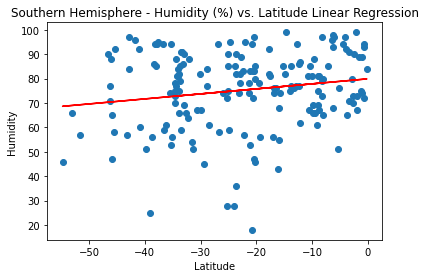

<Figure size 432x288 with 0 Axes>

In [114]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/SH_Humidity_vs_Lat_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 50.04
The r-squared is: 0.12167690566152517


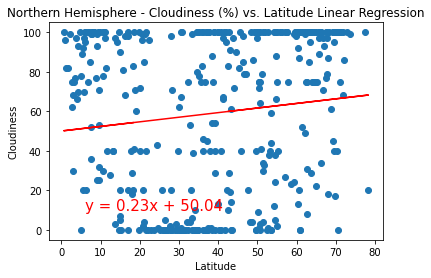

<Figure size 432x288 with 0 Axes>

In [115]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/NH_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 64.94
The r-squared is: 0.06193302943270533


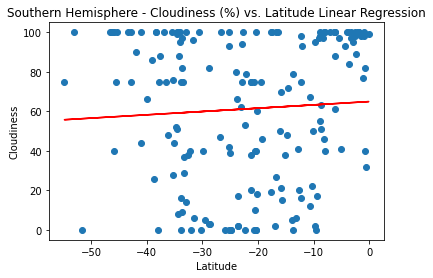

<Figure size 432x288 with 0 Axes>

In [116]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/SH_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.07
The r-squared is: 0.13074332181562437


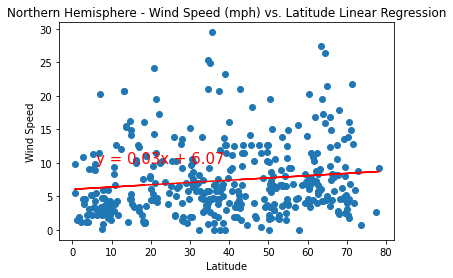

<Figure size 432x288 with 0 Axes>

In [117]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/NH_Wind_Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.11x + 6.29
The r-squared is: -0.24332784483011938


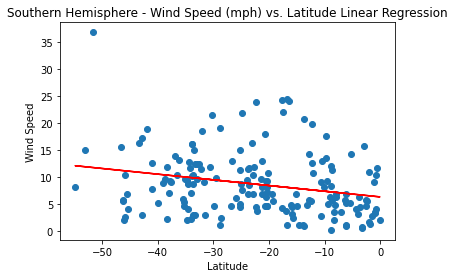

<Figure size 432x288 with 0 Axes>

In [118]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

# Save Figure
plt.savefig("../WeatherPy/SH_Wind_Speed.png")